# The STATS NetCDF files

How to use Xarray with the -STATS.nc NetCDF files

In [1]:
import pyopia.statistics
import pyopia.pipeline
import pyopia.io

## Loading processed data from disc using Xarray

This is data that would normally be written by {func}`pyopia.io.make_xstats` or at the end of a processing pipeline (see {class}`pyopia.pipeline.Pipeline`)

In [2]:
xstats = pyopia.io.load_stats('test-STATS.nc')
xstats

<xarray.Dataset>
Dimensions:                     (index: 8700)
Coordinates:
  * index                       (index) int32 0 1 2 3 4 ... 865 866 867 868 869
    time                        (index) datetime64[ns] 2018-11-01T14:27:31.83...
Data variables: (12/17)
    export name                 (index) object 'D20181101T142731.838206-PN0' ...
    major_axis_length           (index) float64 6.176 15.52 21.23 ... 6.34 5.779
    minor_axis_length           (index) float64 2.744 13.09 ... 4.598 2.874
    equivalent_diameter         (index) float64 3.909 14.14 ... 5.412 4.068
    minr                        (index) float64 3.0 3.0 ... 2.033e+03 2.037e+03
    minc                        (index) float64 77.0 1.896e+03 ... 1.754e+03
    ...                          ...
    probability_faecal_pellets  (index) float64 0.004881 2.016e-06 ... 0.004636
    probability_copepod         (index) float64 0.003022 7.33e-06 ... 0.004511
    probability_diatom_chain    (index) float64 0.004415 2.536e-06 ... 0.00513
    probability_oily_gas        (index) float64 0.106 0.0222 ... 0.1116 0.04442
    timestamp                   (index) datetime64[ns] 2018-11-01T14:27:31.83...
    saturation                  (index) float64 21.67 21.67 ... 21.67 21.67
Attributes:
    steps:           [general]\nraw_files = "raw_data/*.silc"\npixel_size = 2...
    Modified:        2024-08-09 07:59:40.392013
    PyOpia version:  1.1.4

## Access the settings used to process the data

This is metada contained within the 'steps' attribute. {func}`pyopia.pipeline.steps_from_xstats` can extract this from the xarray for you:

In [3]:
toml_steps = pyopia.pipeline.steps_from_xstats(xstats)
toml_steps

{'general': {'raw_files': 'raw_data/*.silc', 'pixel_size': 24},
 'steps': {'classifier': {'pipeline_class': 'pyopia.classify.Classify',
   'model_path': 'keras_model.h5'},
  'load': {'pipeline_class': 'pyopia.instrument.silcam.SilCamLoad'},
  'imageprep': {'pipeline_class': 'pyopia.instrument.silcam.ImagePrep',
   'image_level': 'imraw'},
  'segmentation': {'pipeline_class': 'pyopia.process.Segment',
   'threshold': 0.85},
  'statextract': {'pipeline_class': 'pyopia.process.CalculateStats'},
  'output': {'pipeline_class': 'pyopia.io.StatsToDisc',
   'output_datafile': './test'}}}

You can use this to modify settings, or re-process a dataset using {class}`pyopia.pipeline.Pipeline`

Or you might want to access some other metadata, such as pixel size, for use in analysis:

In [4]:
toml_steps['general']['pixel_size']

24

We can plot directly from xarray in exactly the same way as from the Pandas DataFrame (so it doesn't matter which you use here). The benefit of 'xstats' as an xarray is that it now contains it's own metadata

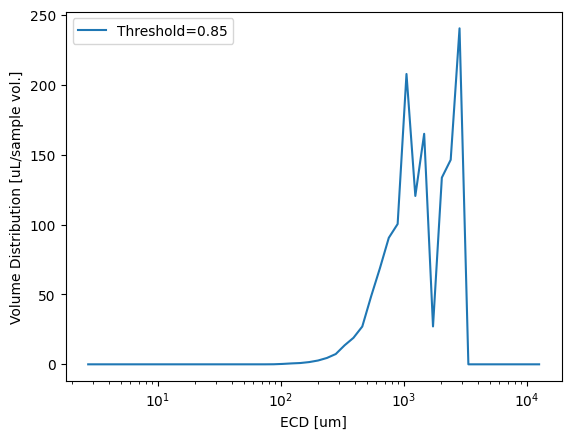

In [5]:
import matplotlib.pyplot as plt

dias, vd = pyopia.statistics.vd_from_stats(xstats, toml_steps['general']['pixel_size'])

plt.plot(dias, vd, label=f"Threshold={toml_steps['steps']['segmentation']['threshold']}")
plt.xscale('log')
plt.xlabel('ECD [um]')
plt.ylabel('Volume Distribution [uL/sample vol.]')
plt.legend()
plt.show()